# Time Series Anomaly Detection using Keras

## Fionn McCarthy - G00301126
<center><img src="images/intro.png"/></center>
Image Source [1] https://ff12.fastforwardlabs.com/

<hr style="border-top: 1px solid #001a79;" />

## Introduction 
In this notebook I will run through the Keras Timeseries anomaly detection website which canbe found here https://keras.io/examples/timeseries/timeseries_anomaly_detection/ , there is also a link to the corresponding notebook here: https://github.com/keras-team/keras-io/blob/master/examples/timeseries/timeseries_anomaly_detection.py . I will explore the same concepts used in this notebook with the hope to give a more in-depth understanding of the topic and the terminologies and methods used in the notebook. This jupyter notebook will look at how a reconstruction convolutional autoencoder model can be used in order to detect anomalies in timeseries data. I aim to break down the process being followed on the website along with trying to explain what each section of code is trying to do. 
<br>
<br>
### Tensorflow and Keras
The open source library Tensorflow is utilised in this notebook as it is utilised for numerical computation which enables fast and efficient use of machine learning and developing neural networks https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html. <br>
There is a deep learning API within Tensorflow called Keras which will be used in this notebook. It is a fast powerful deep learning which enables fast experimentation. The API is simple in use although is complex in how it works, flexible and powerful enough to provide performnace and strength to industrie shigh standards https://keras.io/about/.
<br>
<br>
### Time Series Anomaly Detection
An anomaly is "something that deviates from what is standard, normal, or expected" https://www.merriam-webster.com/dictionary/anomaly. Anomalies within a time series dataset are the peaks/spikes or drops/troughs within the data, so we can say that anomaly detection is the process of highlighitng these anomalies in the dataset https://www.section.io/engineering-education/anomaly-detection-model-on-time-series-data-using-isolation-forest/#:~:text=Anomalies%20are%20spikes%20or%20drops,train%20a%20time%20series%20model. When forecasting on a dataset it is thses anomalies within the dataset that can cause issues or skew results when running forecasts on the data. <br>
A time series is observations of defined values of repeated measurements collated over defined tine intervals https://www.abs.gov.au/websitedbs/d3310114.nsf/home/time+series+analysis:+the+basics. An exmaple of a time series could be population over time, an example of this can be seen in the plotted example below:


<center><img src="images/timseries_eg.jpeg"/></center>


<br>
Image Source: https://towardsdatascience.com/time-series-analysis-for-beginners-8a200552e332
<br>
When we put this information toegther, timer series anomaly detection is the process for identifying the anomalies in the time series dataset https://www.section.io/engineering-education/anomaly-detection-model-on-time-series-data-using-isolation-forest/#:~:text=Anomaly%20detection%20is%20the%20process,the%20anomalies%20in%20our%20dataset.. 
<br>
<br>


### Machine Learning and Neural Networks
Machine learning is a strand of artificial intelligence (AI) and computer sciences which emphasises the use of data and algorithms in order to emulate the way in which humans learning, while continuously imjproving accuracy https://www.ibm.com/topics/machine-learning. MAchine learning has many applicabilities in todays modern world such as detecting credit card fraud, the models are able to identify from patterns of normal behavior with credit cards. Once these algorithms are in place, they are very fast to identify changes in the normal behaviour which will show fraudulant transactions https://www.ravelin.com/insights/machine-learning-for-fraud-detection. The principles for machine learning are the same for identifying anomalies in the time series data. 

Neural networks are a type of machine learning, where the machine is program similar to the human brain in order to enable the model to make a decision with data https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain.. It is a process known as deep learning https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain..

<center><img src="images/neural.png"/></center>
Image Source: https://www.whyofai.com/blog/ai-explained
<br>
They are made up of inter-connected hidden layers of artifical neurons which are also known as nodes that carry out teh operations on teh input data to come to a potentially optimised output, another exmaple image can be seen below. 
<center><img src="images/neural2.png"/></center>
Image Source: https://www.ibm.com/topics/neural-networks
<br>
<br>

### Autoencoders
Above I have discussed machine learning and neural networks, the autoencoder is a type of artifical neural network. An autoencoder neural network that is trained
to reconstruct the given input, their purpose is learning in an unsupervised manner and to represent the data in an informative manner https://arxiv.org/pdf/2003.05991v2.pdf Dor Bank, Noam Koenigstein, Raja Giryes 3rd April 2021. 
<center><img src="images/deep_autoencoder.png"/></center>

Image Source: https://wiki.pathmind.com/deep-autoencoder
<br>
An autoencoder is used in this notebook for teh purpose of anomaly detection. The aim is to train this autoencoder to learn the latentsubspace of normal samples, the once it has been trianed it should with a low reconstruction error for normal samples, and high reconstruction error for anomalies within the data  https://arxiv.org/pdf/2003.05991v2.pdf Dor Bank, Noam Koenigstein, Raja Giryes 3rd April 2021. So, the autoencoder will be trained on data where we will set discover what the limit of error is for the training data, if this is set and applied to our testing data, this shoudl enable us to find the anomalies where in this case there are peaks which have thrown errors for the autoencoder. The autoencoder will reconstruct our input in this notebook, teh process will be shown further down in the notebook as we train the model.
<br> 
<br> 
<hr style="border-top: 1px solid #001a79;" />


## The Dataset
As per the the documentation on the Keras website at https://keras.io/examples/timeseries/timeseries_anomaly_detection/ we will use the Numenta Anomaly Benchmark (NAB) dataset for the purpose of this analysis. One dataset will be used initially to train the model and then a second dataset will be used to evaluate and test our model, these datasets are the art_daily_small_noise.csv file and the art_daily_jumpsup.csv file respectively. It is a univariate time series dataset, meaning it consists of a single value and an associated time. 

The Numenta Anomaly Benchmark (NAB) is a unique gauge for evaluating algorithms for anomaly detection in for use in applications. There are over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. The data is all open-source and has a lot documentation to go with and has another link to a github page which hosts information on a scoreboard of anomaly detection algorithms. This can be accessed at the following link github.com/numenta/NAB. This repository provides in-depth detail on evaluation of anomaly detection algorithsm with the Numenta Anomaly Benchmark.

Both datasets used in this notebook have been generated artificially, one with anomalies and one without anomalies. It is time series data and has two variables the timestamp and the value for that point in time. We have a value for every 5 mins over a 14 day period.
 
It is important to understand what a tensor is as it will be one of the main types of data used in this notebook. A tensor is just like a data container with a certain number of dimensions which enables us to describe the mathematical relationship between these different tensors. Tensors also include descriptions of the valid linear transformations between tensors https://www.kdnuggets.com/2018/05/wtf-tensor.html. The tensor is often referred to as the matrice of N-dimensional space https://www.kdnuggets.com/2018/05/wtf-tensor.html.
<br> 
![SNOWFALL](images/scalar-vector-matrix-tensor.png)
<br> 
Image Source: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/
<br> 
When it comes to neural networks and machine learning these tensors can represent the transformation of the input data which will then enable to get our desired output data for this purpose. 
<br>


In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

#Layers of Neural Networks
from tensorflow.keras import layers 

# Plotting
import matplotlib.pyplot as plt

<hr style="border-top: 1px solid #001a79;" />

### Loading the Data
Accessing the data and then loading it for use in the notebook. 

<hr style="border-top: 1px solid #001a79;" />

I will bring in the datasets which I discussed above previously. 

Below is the url to access both the csv files online and full link to bring in both the datasets I will use in this notebook. 




In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

<hr style="border-top: 1px solid #001a79;" />

### Exploring the Data

<hr style="border-top: 1px solid #001a79;" />


In [3]:
# creating dataframe with no anomaly data
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [4]:
# quick look at data
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [5]:
# exploring the data
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [6]:
# looking at first row
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [7]:
# first value
df_small_noise.iloc[0]['value']

18.3249185392

In [8]:
# first value
df_small_noise.iloc[0].values[0]

18.3249185392

#### Visualize the data
Looking at the time series data that is without anomalies.<br>
Thsi is the data that will be used in order to train the model, the reason why we used the data with no anmolaies to train the model is we will be able to fit a model where there is no abormalities in the data then it will be trained on data to ahve no spikes or drops in it. So when it comes to running the model on data that has anomalies, it has the abilities to identify where these spikes or drops ahve occured. 

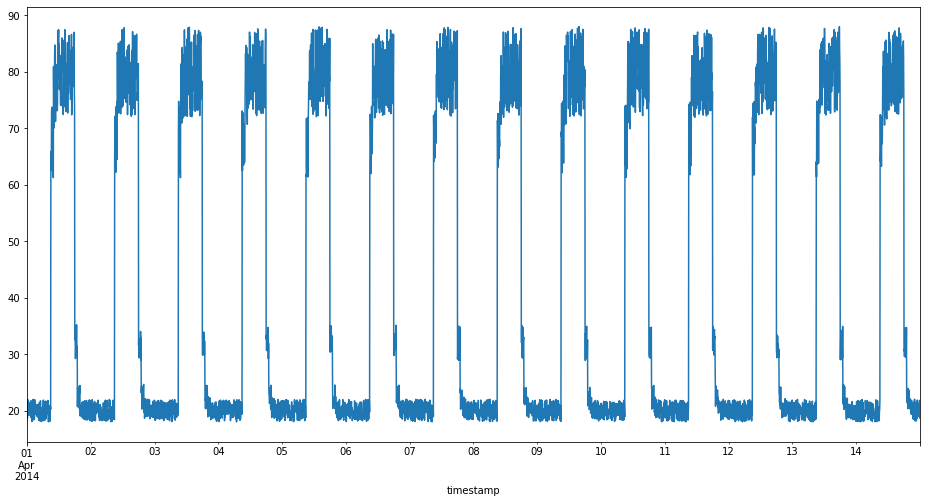

In [9]:
# defining axes
fig, ax = plt.subplots(figsize=(16,8))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

Timeseries data with anomalies
We will use the following data for testing and see if the sudden jump up in the data is detected as an anomaly.

In [10]:
# creating dataframe with anomaly data, setting the timestamp as teh index column
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [11]:
# quick look at data 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [12]:
# exploring data quickly
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [13]:
# first value
df_daily_jumpsup.iloc[0]['value']

19.761251903

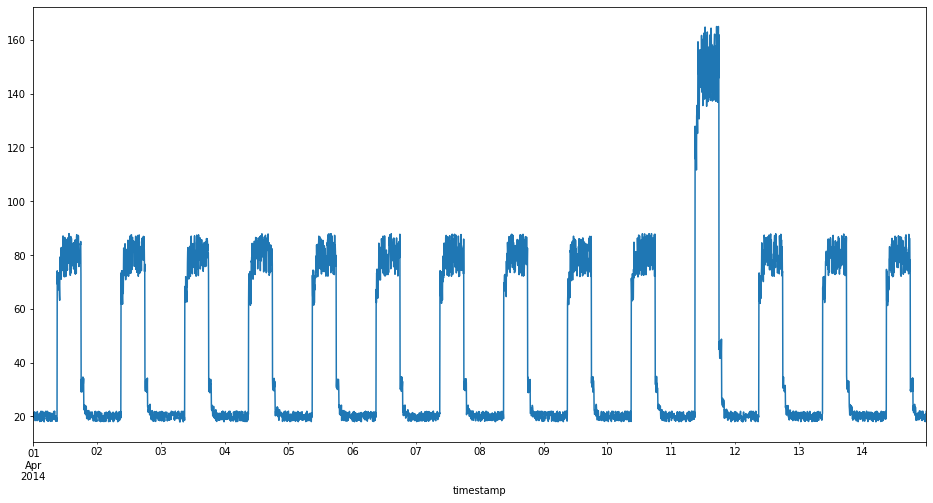

In [14]:
# defining axes
fig, ax = plt.subplots(figsize=(16,8))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

<hr style="border-top: 1px solid #001a79;" />

## Pre-processing

<hr style="border-top: 1px solid #001a79;" />

Pre-pocessing is required in order to prepare the data to be inserted into the neural network. I will first carry out some pre-processing task on the data in order to prepare the data for this analysis. This is essentially a data cleansing and processing technique used on data before we carry out machine learning techniques on the data. Most common techniques used in this area are standardising the data values or normalising the data values. Another way is by transsofmring the data. 

### Normalising the data
We will first look at whether we should standardise or normalise the data values. In order to see which route we take we need to plot the data, having plotted the data above previous we have already carried out this part of the process. 

The distribution of this data will dictate whether to normalise or standardise the data https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed. If the data follows a Gaussian distribution, which is bell-curved data when plotted then you would satndardise the data. As the data does not follow this distribution we need to normalise the data. 

Normalising the data involves scaling the data, in order to achieve this we will get the mean and standard of the values and the following formula will give us our normaliused values: 

$$ Z = {x - \mu \over \sigma} $$

I will apply this to the values prior to moving to the next stage of the analysis. 

In [15]:
# gettign the mean of the values
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [16]:
# geting the standard deviation of the values
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [17]:
# normalising the values 
df_train_vals = (df_small_noise - train_mean) / train_std

# quick look at values outputted
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


With this technique complete we will do a quick check to see the mean is almost zero and that the standard deviation is near 1. 

In [18]:
# check mean
df_train_vals['value'].mean()

-2.616541242931684e-15

In [19]:
# check standard deviation
df_train_vals['value'].std()

1.0000000000000018

Conditions are satisfied, data is normalised. 

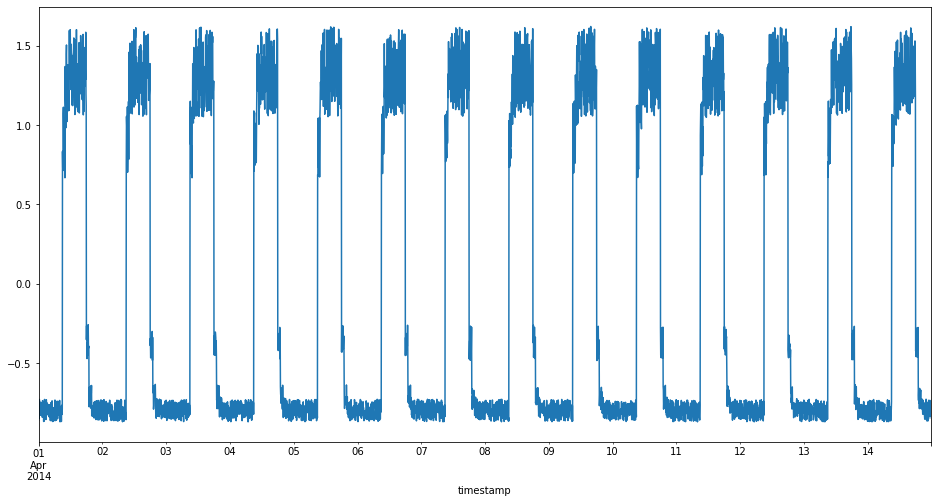

In [20]:
# defining our plot
fig, ax = plt.subplots(figsize=(16,8))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

### Transforming the data
In this section we will look at ways to tarnsform the data, in the notebook they use the method of windows in order to do this or as they refer to 'time steps'. This involves paritioning the data into different subsections in order top slide the window along the data to predict the next section of the data. The method of utilising previous time steps to forecast the next time step in the series https://machinelearningmastery.com/time-series-forecasting-supervised-learning/#:~:text=The%20use%20of%20prior%20time,or%20size%20of%20the%20lag. . 

In [21]:
# Looking at dataset shape, number of values, 4032 rows in dataset
df_train_vals.shape

(4032, 1)

The terminology of using of 'time steps' is used in the website, but it can be called windows or sub-sections too. To epxlain this method, we effectively slide across the data looking at the datantained in that window at any one time. 

![Window](images/window.png)
Image Source: https://www.semanticscholar.org/paper/Time-Series-Data-Prediction-Using-Sliding-Window-Hota-Handa/91037f01fd4b845eadca0b53f5dc00d9f61ac493

I will explain by looking at a list of numbers L below. I want to create subsections or windows of that data of size three. This window will slide across the data breaking our list into groups of three numbers which are side by side. 

In [22]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

Number of windows achievable in the dataset is calculated below.

In [23]:
# Number of windows achievable
len(L) - win_size + 1

10

In [24]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

#Print the windows for example
wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [25]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

I will now look at applying this very same logic to our time series data. 

In [26]:
# number of time steps in the data or window size
window_size = 288

In [27]:
# defining windows formula
def windows(vals, N=window_size):
  # set L to be an empty list
  L = []
  # loop through data
  for i in range(len(vals) - N + 1):
    # append winodw to the list
    L.append(vals[i:i+N])
  # stack() is used to stack our windows on top of one another
  return np.stack(L)

In [28]:
# create windows from df_train_vals data
x_train = windows(df_train_vals)
# print first value in first window and last value last window
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [29]:
# check against first and last value in initial values
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [30]:
#quick look at the data
x_train

array([[[-0.85882857],
        [-0.72899302],
        [-0.84814772],
        ...,
        [-0.86453747],
        [-0.81250829],
        [-0.79671155]],

       [[-0.72899302],
        [-0.84814772],
        [-0.72958579],
        ...,
        [-0.81250829],
        [-0.79671155],
        [-0.78767946]],

       [[-0.84814772],
        [-0.72958579],
        [-0.731173  ],
        ...,
        [-0.79671155],
        [-0.78767946],
        [-0.73706287]],

       ...,

       [[-0.8226548 ],
        [-0.86660975],
        [-0.82181363],
        ...,
        [-0.79164661],
        [-0.78025492],
        [-0.83364049]],

       [[-0.86660975],
        [-0.82181363],
        [-0.75595835],
        ...,
        [-0.78025492],
        [-0.83364049],
        [-0.73510213]],

       [[-0.82181363],
        [-0.75595835],
        [-0.74256753],
        ...,
        [-0.83364049],
        [-0.73510213],
        [-0.8460886 ]]])

In [54]:
# shape of data made up of 3745 windows of 288 training examples
x_train.shape

(3745, 288, 1)

We have now parittioned the data into these windows, by sliding the window across these values and ended up with 3,745 windows with 288 values in each window. We have gone form having values to having windows in our data. This how we train the data and build the autoencoder as discussed in the introduction.   

In [32]:
# array vof values
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [33]:
# first window in training data flattened
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

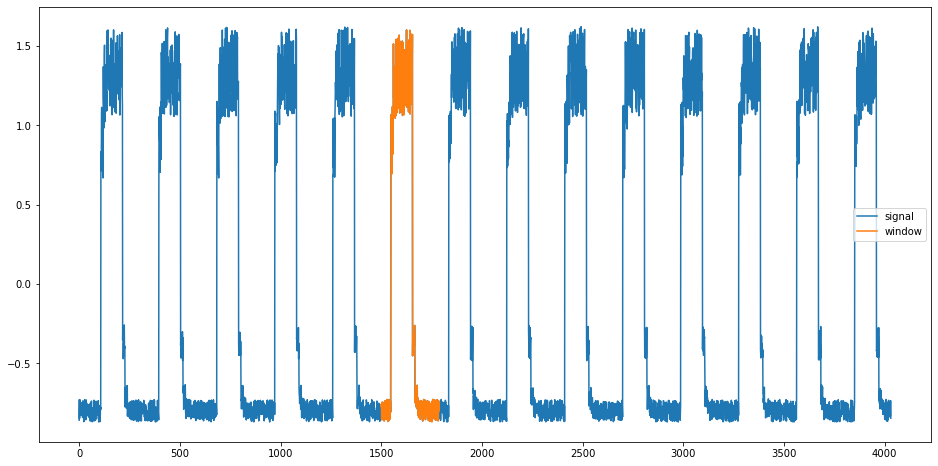

In [56]:
# picking a window in the data
window_no = 1500

# 
fig, ax = plt.subplots(figsize=(16, 8))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

<hr style="border-top: 1px solid #001a79;" />

## Neural Network
### Building the Model

<hr style="border-top: 1px solid #001a79;" />

In [35]:
# mode will take input in the shape of (batch_size, sequence_length, num_features)
x_train.shape

(3745, 288, 1)

As discussed in the introduction the input needs to be reconstruced in order to build the convolutional reconstruction autoencoder model. The layers are created by the functions in the layers list below. 

1. Input Object: The input object brings the initial data into the system for processing and it's main purpose is to instantiate a Keras tensor https://keras.io/api/layers/core_layers/input/.

2. 1st Conv1D: This is the first 1-D convolution layer with 32 filters. This layer will apply sliding convolutional filters to 1-D input to help extract needed output, the 32 filters is the dimensionality of the output https://keras.io/api/layers/convolution_layers/convolution1d/.

3. 1st Dropout: The dropout layer helps with overfitting randomly sets input units to 0 with a frequency of rate at each step during training time and then the inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged, this only applies ot trianing https://keras.io/api/layers/regularization_layers/dropout/. rate is set to 0.2.

4. 2nd Conv1D: This is the second 1-D convolution layer, it uses 16 filters in order to generate an ouput of that dimension. 

5. 1st Conv1D Transpose:  This is the first 1-D convolution transpose layer with 16 filters. This layer is transposed because of the need to hav a trasnofrmation going in th opposite direction to the regular convolution. For example, something that has the shape of the output of some convolution to something that has the shape of its input while keeping the same a connectivity layout.https://keras.io/api/layers/convolution_layers/convolution1d_transpose/. 16 filters to get output of thsi dimension. 

6. 2nd Dropout: The second dropout layer applies the same logic as the first dropout layer. rate is set to 0.2 again.

7. 2nd Conv1D Transpose:This is the second 1-D convolution transpose layer, 32 filters to get output of this dimension. 

8. 3rd Conv1D Transpose:This is the third 1-D convolution transpose layer and only has one filter in place in order to get us back to the required output as our input size but with the padding set to 'same' it will pad out the output iwth 0's to give us the same dimensions as the input. 

The layers show the same reconstruction pattern as the first convoution layer has 32 filters, then we the dropout of 0.2, a convolution layer of 16 filters, the transpose convolution layer of 16 filters, a dropout of 0.2, a transposed convolution layer created with 32 filters and then teh final 1d convolution transpose in order to get an output of teh same sizer as our input which will be padded with zeros to give us this. 

In [36]:
# constructing the convolutional reconstruction autoencoder model
layers = [
  # brings the initial data into the system for further processing
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # first 1d convolution layer
  # apply sliding convolutional filters to 1-D input to help extract needed output, 32 filters
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # helps with overfitting randomly sets input units to 0 with a frequency of rate at each step during training time
  keras.layers.Dropout(rate=0.2),
  # apply sliding convolutional filters to 1-D input to help extract needed output, 16 filters
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # apply sliding convolutional filters tarsnsposed to 1-D input to help extract needed output, 16 filters
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # help prevent overfitting
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]


# arranging the keras model in a sequential order  
model = keras.Sequential(layers)


# algorithm for stochastic gradient descent for training deep learning models
optimizer = keras.optimizers.Adam(learning_rate=0.001)


# defining the loss function, the optimizer and the metrics
model.compile(optimizer=optimizer, loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

The fit method is then used to train the data for a fixed number of iterations on the data https://keras.io/api/models/model_training_apis/. 

In the code we the Keras example has input the same training data with 288 windows of data for the input variable and the output variable, the reaosn this is done is because the datset used to train this data has no anomalies in it and it is a reconstruction model. The epochs have been set to 50 in order to iterate over the data 50 time sin order to come to the final model. The batch size argument will split the data into batches, dependind on the number it is set to. Here the data is split into 128 batches. 

The validation_split argument sets the fraction of the data to be split and taken out from the trianing of the model, so here 0.2 is used. Therefore 20% of the data will be used for validation, so whne the model has comeplted each epoch it will iterate over the validation dataset and compute the validation loss and validation metrics.

Callbacks are another argument used in the model fit which are objects that are called at different points in the training to see if the model is improving, here the EarlyStopping callback is used. In this case it is implemented that mode has been set to 'min' meaning that if the quantity monitored of the validation loss ('val_loss') has stopped decreasing then the training will stop. The patience argument in the callback sets a limit, so if there no improvements within 5 epochs the model will stop training https://keras.io/api/callbacks/early_stopping/. These callbacks are called at different points in the training, e.g. at the start of an epoch, at the end of a batch, at the end of an epoch, etc https://keras.io/api/callbacks/early_stopping/.


In [37]:
# buidling the model, fitting the model to the data
# input and ouput data is same here as this data has no anomlaies in it
# training will stop when the quantity monitored has stopped decreasing
# Stop training when `val_loss` is no longer improving
# 5 epochs without improvement stops training
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 55ms/step - loss: 0.4234 - val_loss: 0.0654
Epoch 2/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0762 - val_loss: 0.0448
Epoch 3/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0570 - val_loss: 0.0342
Epoch 4/50
27/27 [==============================] - 1s 44ms/step - loss: 0.0483 - val_loss: 0.0303
Epoch 5/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0425 - val_loss: 0.0276
Epoch 6/50
27/27 [==============================] - 1s 46ms/step - loss: 0.0385 - val_loss: 0.0254
Epoch 7/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0347 - val_loss: 0.0228
Epoch 8/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0315 - val_loss: 0.0215
Epoch 9/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0292 - val_loss: 0.0207
Epoch 10/50
27/27 [==============================] - 1s 44ms/step - loss: 0.0272 - val_loss: 0.0194
Epoch 11/

<hr style="border-top: 1px solid #001a79;" />

## Evaluation

<hr style="border-top: 1px solid #001a79;" />

The history object is used in order to get the history attribute which will return the loss values and at each of the epochs, it will also tell us the validation loss values and validation metric values when traing and validating the model https://keras.io/api/models/model_training_apis/. 


In [38]:
# training loss vlauers
history.history["loss"]

[0.4233708083629608,
 0.07619305700063705,
 0.057018622756004333,
 0.04829717054963112,
 0.04247141256928444,
 0.03852026164531708,
 0.03472903370857239,
 0.031463731080293655,
 0.02922789379954338,
 0.027229173108935356,
 0.025748616084456444,
 0.024503499269485474,
 0.023383740335702896,
 0.02237369678914547,
 0.02137875370681286,
 0.020381875336170197,
 0.019439950585365295,
 0.01875239796936512,
 0.018143823370337486,
 0.017537128180265427,
 0.016995368525385857,
 0.01643177680671215,
 0.01597636006772518,
 0.015513522550463676,
 0.015079980716109276,
 0.014667123556137085,
 0.01425616629421711,
 0.013914808630943298,
 0.013463720679283142,
 0.013084039092063904,
 0.012739568948745728,
 0.012328241020441055,
 0.012003469280898571,
 0.011651298962533474,
 0.011249532923102379,
 0.010969714261591434,
 0.01060222927480936,
 0.010323463007807732,
 0.009969268925487995,
 0.00972471758723259,
 0.00942839216440916,
 0.009180525317788124,
 0.008913455531001091,
 0.008693316951394081,
 0.00

In [39]:
history.history["val_loss"]

[0.06541882455348969,
 0.04481317475438118,
 0.03415543958544731,
 0.030304068699479103,
 0.027582518756389618,
 0.025351326912641525,
 0.02279024012386799,
 0.021495986729860306,
 0.020726796239614487,
 0.0194336399435997,
 0.019467899575829506,
 0.019669875502586365,
 0.018884412944316864,
 0.017952702939510345,
 0.017708051949739456,
 0.017146866768598557,
 0.01622401364147663,
 0.017183586955070496,
 0.016344768926501274,
 0.014543160796165466,
 0.015472648665308952,
 0.015239778906106949,
 0.013581477105617523,
 0.012796592898666859,
 0.013026021420955658,
 0.012093464843928814,
 0.011882332153618336,
 0.012460161000490189,
 0.01101890578866005,
 0.012199761345982552,
 0.010522790253162384,
 0.011222912929952145,
 0.010809117928147316,
 0.00958976149559021,
 0.010073292069137096,
 0.008905025199055672,
 0.008408498018980026,
 0.00816361140459776,
 0.008217599242925644,
 0.007829691283404827,
 0.007298725191503763,
 0.007348960265517235,
 0.007181250024586916,
 0.006849257741123438

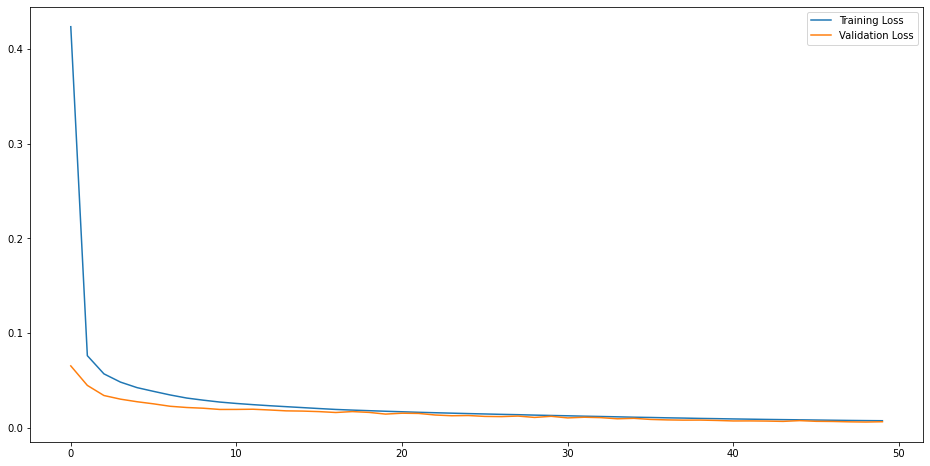

In [40]:
# defining our plot size 
fig, ax = plt.subplots(figsize=(16, 8))

# ploting the training loss values
ax.plot(history.history["loss"], label="Training Loss")

# plotting the validation loss values 
ax.plot(history.history["val_loss"], label="Validation Loss")

# add legend to plot 
ax.legend();

In [41]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 7ms/step


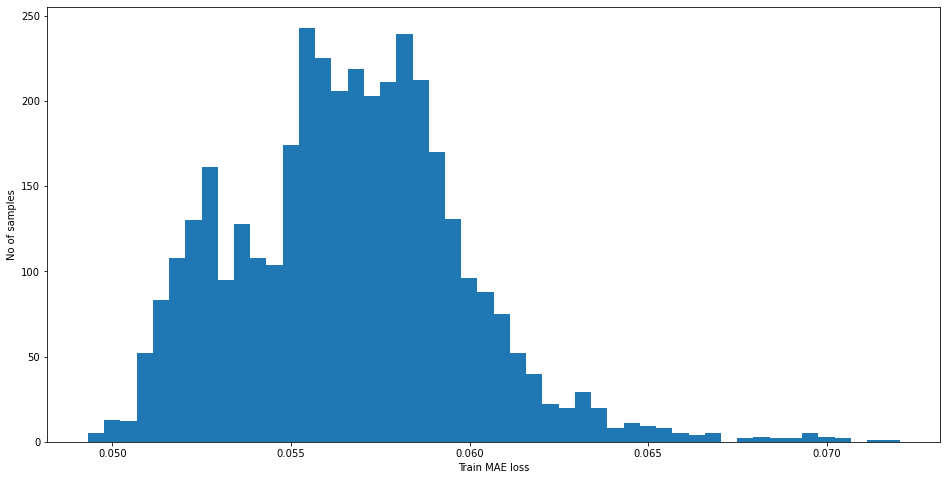

In [42]:
# Calculate mean squared loss
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

# defining our plot size 
fig, ax = plt.subplots(figsize=(16, 8))

# plotting histogram of MAE loss
ax.hist(train_mae_loss, bins=50)

# x label
ax.set_xlabel("Train MAE loss")

# y label
ax.set_ylabel("No of samples");

In [43]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# print it out
threshold

0.0720372064646797

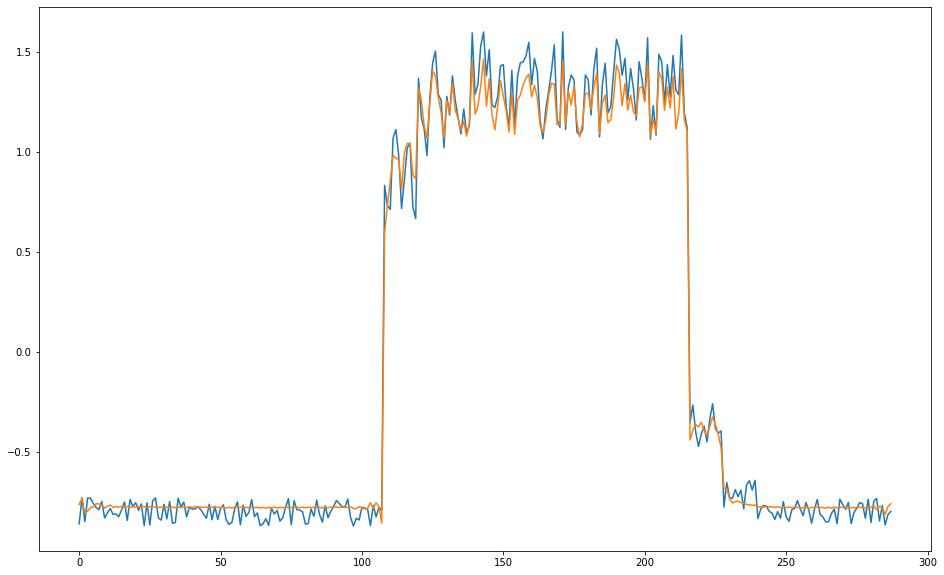

In [44]:
# defining the figure and axes 
fig, ax = plt.subplots(figsize=(16, 10))

# plot first window training data
ax.plot(x_train[0])

# plot first window predicted data
ax.plot(x_train_pred[0]);

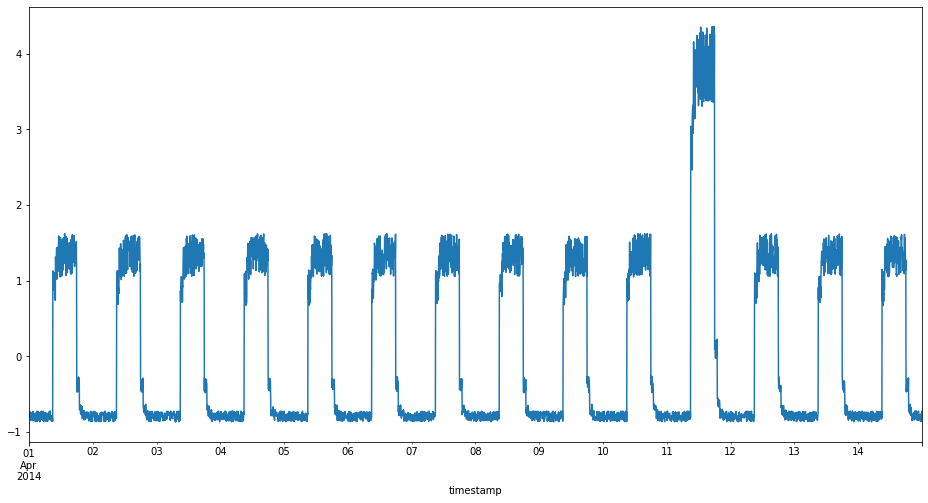

In [45]:
# normalising the values
df_test_value = (df_daily_jumpsup - train_mean) / train_std

# defining figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# plotting the normalised data
df_test_value.plot(legend=False, ax=ax);

In [46]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [47]:
# run the model on the test data
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 8ms/step


Look at what test MAE loss is....







In [48]:
# calculate the mae loss for test data 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss

array([[0.05534812],
       [0.05396986],
       [0.05587804],
       ...,
       [0.05870589],
       [0.05764159],
       [0.05725716]])

In [49]:
# format data into a row instead of a column
test_mae_loss = test_mae_loss.reshape((-1))
test_mae_loss

array([0.05534812, 0.05396986, 0.05587804, ..., 0.05870589, 0.05764159,
       0.05725716])

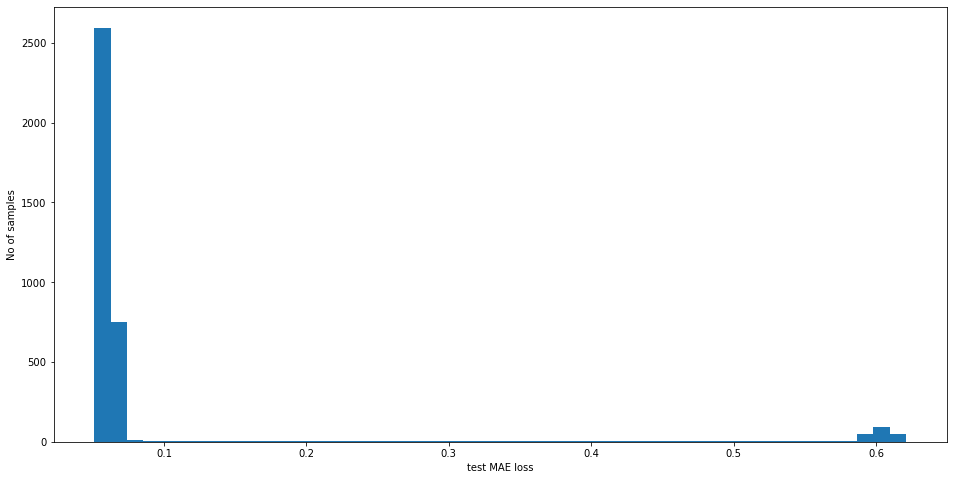

In [50]:
# defining figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# histogram of mae loss data
ax.hist(test_mae_loss, bins=50)

# x label 
ax.set_xlabel("test MAE loss")

# y label
ax.set_ylabel("No of samples");

To find the anomalies in the data, we create the inequality that if the MAE loss is greater than the threshold which was the maximum mae loss for the training data. This is the definition used for the anomaly, the number of these is outputted below. 

In [51]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

404

In [52]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

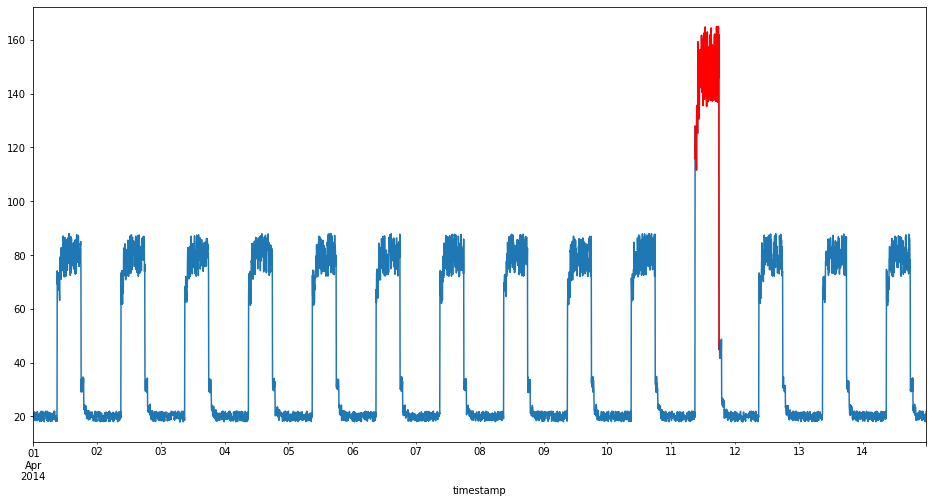

In [53]:
# subset of dataset where there are anaomalies
df_subset = df_daily_jumpsup.iloc[inds]

# defining figure and axes
fig, ax = plt.subplots(figsize=(16, 8))
 
# plot dataset 
df_daily_jumpsup.plot(legend=False, ax=ax)

# plot the anomalies in red on same graph
df_subset.plot(legend=False, ax=ax, color="r");

## References
 1. https://www.kaggle.com/datasets/boltzmannbrain/nab 